<a href="https://colab.research.google.com/github/brandonthimmesch/IMSE541/blob/main/SQC_Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Brandon Thimmesch
IMSE 541 - Lab 6
12 October 2022

In [135]:
# importing libraries
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [136]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Ex 13.19
A nickel–titanium alloy is used to make components
for jet turbine aircraft engines. Cracking is a potentially serious problem in the final part because it can
lead to nonrecoverable failure. A test is run at the parts
producer to determine the effect of four factors on
cracks. The four factors are pouring temperature (A),
titanium content (B), heat treatment method (C), and
amount of grain refiner used (D). Two replicates of
a 24 design are run, and the length of crack (in mm
× 10−2
) induced in a sample coupon subjected to a
standard test is measured. The data are shown in
Table 13E.6.

(a) Estimate the factor effects. Which factor effects
appear to be large?

(b) Conduct an analysis of variance. Do any of the
factors affect cracking? Use a = 0.05.

(c) Write down a regression model that can be used
to predict crack length as a function of the significant main effects and interactions you have
identified in part (b).

(d) Analyze the residuals from this experiment.

(e) Is there an indication that any of the factors affect
the variability in cracking?

(f) What recommendations would you make regarding process operations? Use interaction and/or
main effect plots to assist in drawing conclusions.

In [137]:
# reading in data
data = pd.read_csv('drive/My Drive/Colab Notebooks/SQC/SQC_Lab6_Data.csv', sep=',', na_values=".")
data.head()

,a,b,c,d,result
0,-1,-1,-1,-1,7.037
1,1,-1,-1,-1,14.707
2,-1,1,-1,-1,11.635
3,1,1,-1,-1,17.273
4,-1,-1,1,-1,10.403


In [138]:
X=data[['a', 'b', 'c','d']]
X.head()

,a,b,c,d
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1


In [139]:
# convert input columns into a polynomial matrix with intercept column 
# computation is done in numpy and convert it into Panda dataframe
xx=X.to_numpy()
poly= PolynomialFeatures(degree=4, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']) #if interaction_only=False, then 1, a, b, a^2, ab, b^2
xxpd.head()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0


In [140]:
# reduced model using main effect and two-way interactions 
# predicted response using skleran LinearRegression fit

X=xxpd[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y=data[['result']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Yhat

array([[ 8.2573125],
       [13.4478125],
       [10.2538125],
       [19.1165625],
       [ 8.6496875],
       [ 5.8246875],
       [10.8381875],
       [11.6854375],
       [10.3426875],
       [15.3371875],
       [12.2376875],
       [21.2964375],
       [10.5813125],
       [ 7.5603125],
       [12.6683125],
       [13.7115625],
       [ 8.2573125],
       [13.4478125],
       [10.2538125],
       [19.1165625],
       [ 8.6496875],
       [ 5.8246875],
       [10.8381875],
       [11.6854375],
       [10.3426875],
       [15.3371875],
       [12.2376875],
       [21.2964375],
       [10.5813125],
       [ 7.5603125],
       [12.6683125],
       [13.7115625]])

# Ex 13.19 (a)

In [141]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is xxpd with the first column I
X=xxpd[['I','a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     12.90
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           7.35e-07
Time:                        23:00:31   Log-Likelihood:                -60.089
No. Observations:                  32   AIC:                             142.2
Df Residuals:                      21   BIC:                             158.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.345     34.721      0.0

Factors a (pouring temperature), b (titanium content), c (heat treatment method), and the two way interaction ab, ac, and bc yield relatively large coefficient magnitudes in the above regression results. Additionally, factors a, b, c, and the two way interactions ab, ac, and bc all yield P-values less than 0.05 indicating that they have a significant impact on results (crack length).

Since factor c and the two factor interactions bc and bd have negative coefficients, the production company should wish to maximize these factors. In this scenario, negative coefficients are attractive as they'll contribute to reducing crack length.

# Ex 13.19 (b)

In [142]:
# two way anova table
model = ols('result ~ C(a) + C(b) + C(c) + C(d) + C(a):C(b) + C(a):C(c) + C(a):C(d) + C(b):C(c) + C(b):C(d) + C(c):C(d)', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(a),72.908850,1.0,19.104827,0.000268
C(b),126.460656,1.0,33.137389,0.000010
C(c),103.464113,1.0,27.111440,0.000037
C(d),30.662280,1.0,8.034656,0.009929
C(a):C(b),29.926716,1.0,7.841911,0.010721
C(a):C(c),128.496480,1.0,33.670850,0.000009
C(a):C(d),0.046818,1.0,0.012268,0.912857
C(b):C(c),0.073728,1.0,0.019319,0.890779
C(b):C(d),0.017861,1.0,0.004680,0.946105
C(c):C(d),0.047278,1.0,0.012389,0.912432


Looking at the above anova table, factors a, b, c, and d as well as the two way interactions ab and ac yield P-values less than 0.05 suggesting that they directly affect cracking.

Only the two way interactions ad, bc, bd, and cd yield P-values greater than 0.05 meaning that their effect on resulting crack length is inconclusive.

# Ex 13.19 (c)

In [143]:
# reduced model 2 with factors a, b, c, and d as well as the two way interactions ab and ac
X2=xxpd[['I','a', 'b', 'c','d','ab', 'ac']]
Y2=data[['result']]
Y2=Y2.to_numpy()
model2 = sm.OLS(Y2, X2)
res2=model2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     7.255
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           0.000144
Time:                        23:00:31   Log-Likelihood:                -75.412
No. Observations:                  32   AIC:                             164.8
Df Residuals:                      25   BIC:                             175.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9881      0.511     23.468      0.0

# Ex 13.19 (d)

In [144]:
# reduced model 2 residuals
res2.resid

0    -3.28800
1     3.29725
2    -0.63575
3     0.04925
4     3.77025
5    -3.34950
6     0.58950
7    -0.28350
8    -3.72175
9     3.49950
10   -0.35250
11    0.64250
12    3.25550
13   -3.55025
14    0.46175
15   -0.02825
16   -3.94900
17    3.80925
18   -0.18175
19    0.59125
20    3.51825
21   -3.61950
22    0.48250
23   -0.80050
24   -3.33175
25    3.68450
26   -0.57050
27    0.45750
28    3.74650
29   -3.77125
30    0.20675
31   -0.62825
dtype: float64

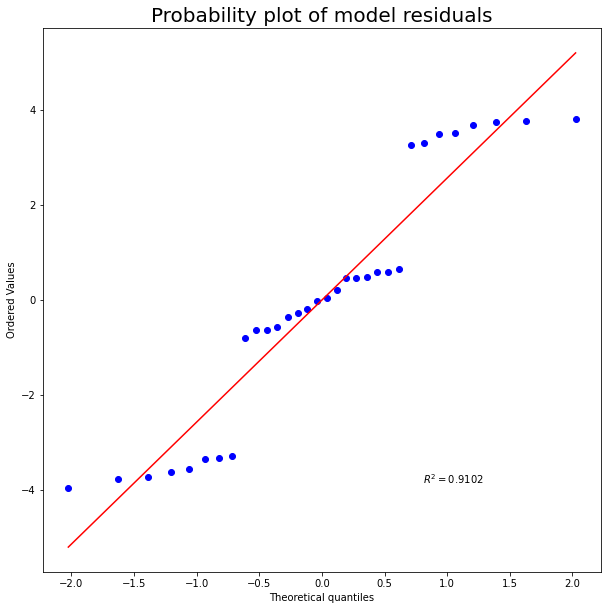

In [145]:
# Residual Analysis of the reduced model 2
# normal check

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residuals", fontsize= 20)
ax.set

plt.show()

The above probability plot shows that the residuals for reduced model 2 do not follow a normal distribution. As a result, any inferences made with confidence that assume normality cannot be made with certainty. 

# Ex 13.19 (e)

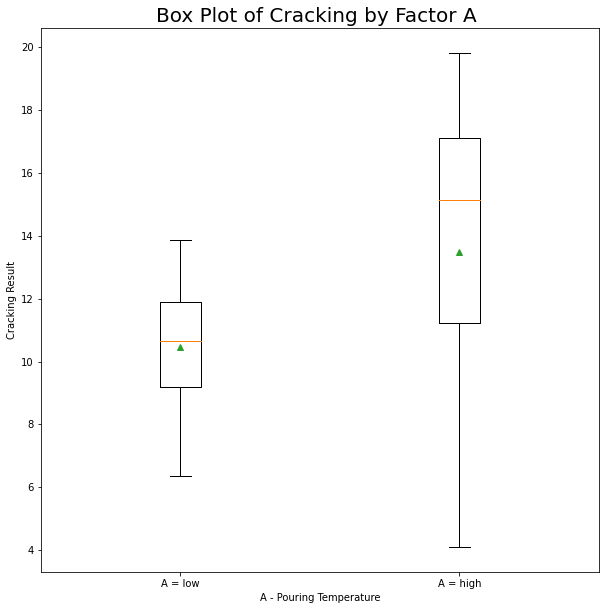

In [146]:
# Box plots by factor A
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracking by Factor A ", fontsize= 20)
ax.set

boxdata= [data['result'][data['a'] == -1],
             data['result'][data['a'] == 1]]


ax.boxplot(boxdata,
           labels= ['A = low', 'A = high'],
           showmeans= True)

plt.xlabel("A - Pouring Temperature")
plt.ylabel("Cracking Result")

plt.show()

The box plot above shows that higher pouring temperatures result in greater variability in crack length as well as longer crack lengths on average.

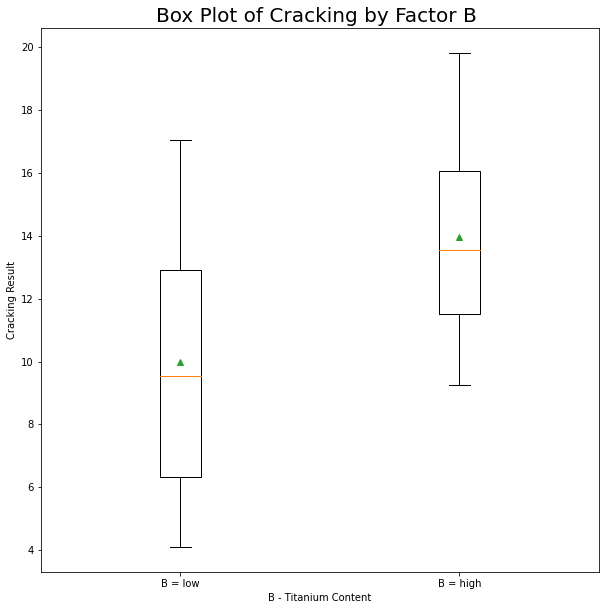

In [147]:
# Box plots by factor B
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracking by Factor B ", fontsize= 20)
ax.set

boxdata= [data['result'][data['b'] == -1],
             data['result'][data['b'] == 1]]


ax.boxplot(boxdata,
           labels= ['B = low', 'B = high'],
           showmeans= True)

plt.xlabel("B - Titanium Content")
plt.ylabel("Cracking Result")

plt.show()

The box plot above shows that higher levels of titanium content result in longer average crack lengths. However, lower levels of titanium content yield greater variability in crack length.

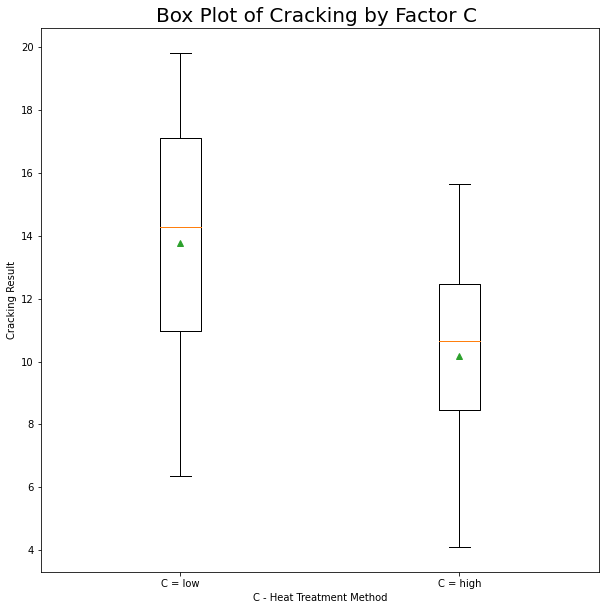

In [148]:
# Box plots by factor C
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracking by Factor C ", fontsize= 20)
ax.set

boxdata= [data['result'][data['c'] == -1],
             data['result'][data['c'] == 1]]


ax.boxplot(boxdata,
           labels= ['C = low', 'C = high'],
           showmeans= True)

plt.xlabel("C - Heat Treatment Method")
plt.ylabel("Cracking Result")

plt.show()

The box plot above shows that the heat treatment method categorized as low results in greater variability and longer average crack lengths. 

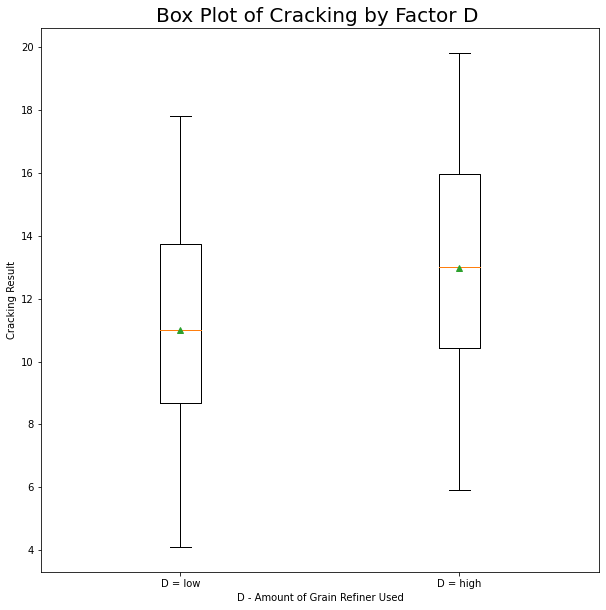

In [149]:
# Box plots by factor D
# If the IRQ=75% quartitle - 25% quartile are very different, then question the constant variance assumption
# If the F test p value is very small, we reject H0 and can use this box plot to identify the best factor level

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Cracking by Factor D ", fontsize= 20)
ax.set

boxdata= [data['result'][data['d'] == -1],
             data['result'][data['d'] == 1]]


ax.boxplot(boxdata,
           labels= ['D = low', 'D = high'],
           showmeans= True)

plt.xlabel("D - Amount of Grain Refiner Used")
plt.ylabel("Cracking Result")

plt.show()

The box plot above shows that using higher amounts of grain refiner results in greater crack length variability and longer crack lengths on average.

# Ex 13.19 (f)

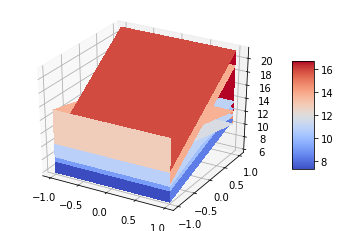

In [150]:
# 3 D plot of model factors a and b
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

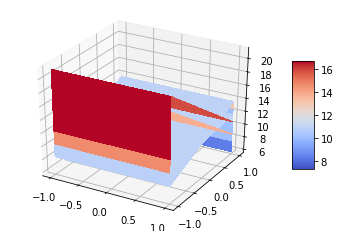

In [151]:
# 3 D plot of model factors a and c
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

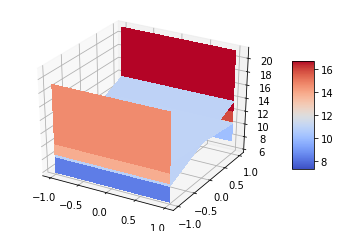

In [152]:
# 3 D plot of model factors a and d
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

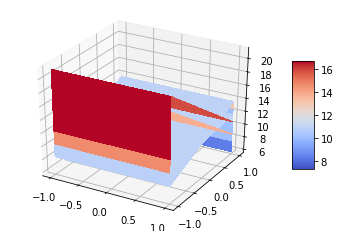

In [153]:
# 3 D plot of model factors b and c
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

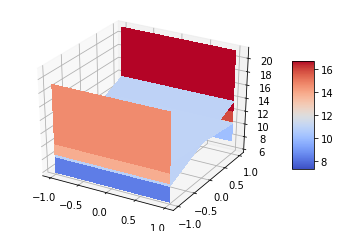

In [154]:
# 3 D plot of model factors b and d
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

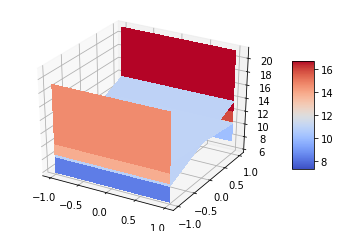

In [155]:
# 3 D plot of model factors c and d
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['c']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

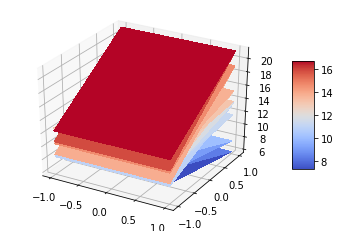

In [156]:
# 3 D plot of model factor a
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['a']
x2=data['a']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

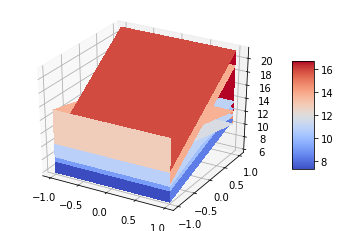

In [157]:
# 3 D plot of model factor b
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['b']
x2=data['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

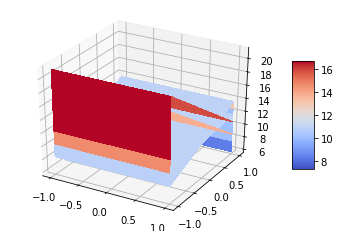

In [158]:
# 3 D plot of model factor c
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['c']
x2=data['c']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

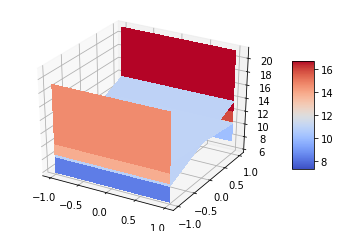

In [159]:
# 3 D plot of model factor d
# Z axis is the predicted observation Yhat

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=data['d']
x2=data['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

As shown above in contour plots, larger crack lengths occur when higher levels of factors a, b, and d are used and when lower levels of factor c are used.

I recommend using lower levels of factors a (pouring temperature), b (titanium content), and d(amount of grain refiner used) as well as higher levels of factor c(heat treatment method). By following these recommendations, the production company can expect to reduce process variability and crack length. 

# Ex 13.20
One of the variables in the experiment described in Exercise 13.19,
heat treatment method (C), is a categorical variable.
Assume that the remaining factors are continuous.

(a) Write two regression models for predicting crack
length, one for each level of the heat treatment
method variable. What differences, if any, do you
notice in these two equations?

(b) Generate appropriate response surface contour
plots for the two regression models in part (a).

(c) What set of conditions would you recommend
for the factors A, B, and D if you use heat treatment method C = +?

(d) Repeat part (c), assuming that you wish to use
heat treatment method C = −.

In [160]:
# creating dataframe containing values where c is equal to 1
C_plus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == 1]
C_plus['result'] = data['result'][data['c'] == 1]
C_plus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,result
23,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,12.923
28,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,12.337
29,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,5.904
30,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,10.935
31,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.053


In [161]:
# creating dataframe containing values where c is equal to -1
C_minus = xxpd[['I', 'a', 'b', 'c','ab', 'ac', 'bc', 'abc','d','ad','bd','abd','cd','acd','bcd','abcd']][xxpd['c'] == -1]
C_minus['result'] = data['result'][data['c'] == -1]
C_minus.tail()

,I,a,b,c,ab,ac,bc,abc,d,ad,bd,abd,cd,acd,bcd,abcd,result
19,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,17.815
24,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,8.951
25,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,17.052
26,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,13.658
27,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,19.639


In [162]:
# predicted response using skleran LinearRegression fit

X3=C_plus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y3=C_plus[['result']]
regr=LinearRegression()
regr.fit(X3,Y3)
Yhat3=regr.predict(X3)
Yhat3

array([[10.2291875],
       [ 4.2808125],
       [ 9.2586875],
       [13.2293125],
       [12.1393125],
       [ 5.9666875],
       [11.1103125],
       [15.3051875],
       [10.2291875],
       [ 4.2808125],
       [ 9.2586875],
       [13.2293125],
       [12.1393125],
       [ 5.9666875],
       [11.1103125],
       [15.3051875]])

In [163]:
# predicted response using skleran LinearRegression fit

X4=C_minus[['a', 'b', 'c','d','ab', 'ac', 'bc','ad','bd','cd']]
Y4=C_minus[['result']]
regr=LinearRegression()
regr.fit(X4,Y4)
Yhat4=regr.predict(X4)
Yhat4

array([[ 6.6778125],
       [14.9916875],
       [11.8333125],
       [17.5726875],
       [ 8.7846875],
       [16.9308125],
       [13.7956875],
       [19.7028125],
       [ 6.6778125],
       [14.9916875],
       [11.8333125],
       [17.5726875],
       [ 8.7846875],
       [16.9308125],
       [13.7956875],
       [19.7028125]])

# Ex 13.20 (a)

In [164]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is C_plus with the first column I

model3 = sm.OLS(Y3, X3)
res3=model3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     467.1
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           1.06e-10
Time:                        23:00:35   Log-Likelihood:                 3.5427
No. Observations:                  16   AIC:                             6.915
Df Residuals:                       9   BIC:                             12.32
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a             -0.2472      0.032     -7.649      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



In [165]:
# use statsmodels for OLS fitting and t statistics
# in this case, X is C_minus with the first column I

model4 = sm.OLS(Y4, X4)
res4=model4.fit()
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:                 result   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     562.7
Date:                Thu, 13 Oct 2022   Prob (F-statistic):           4.59e-11
Time:                        23:00:35   Log-Likelihood:                 1.8147
No. Observations:                  16   AIC:                             10.37
Df Residuals:                       9   BIC:                             15.78
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
a              1.7567      0.036     48.790      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=16



The main difference between these models is the coefficient of factor C. When looking at the regression equation for the positive values of C, the coefficient of factor C (heat treatment method) is positive meaning that it contributes to the formation of longer cracks. When looking at the equation for the negative values of C, the coefficient is negative meaning that it aids in reducing crack length.

Other differences are observed when looking at the coefficient values for other factors. In the regression model for positive values of factor C, the coefficients for factor a and the two factor interaction bc are negative meaning they aid in reducing crack length while all other factors and two factor interactions are positive and increase crack length. In the regression model for negative values of factor C, the coefficient of factors c and d as well as the two factor interactions ac, bc, and bd are negative and reduce crack length while all other coefficients for factors and two factor interactions are positive and contribute to increased crack length.

# Ex 13.20 (b)

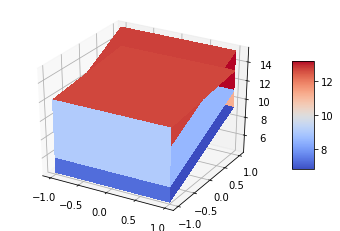

In [166]:
# C_plus
# 3 D plot of model factor a and b vs y
# Z axis is the predicted observation Yhat3

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['a']
x2=C_plus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

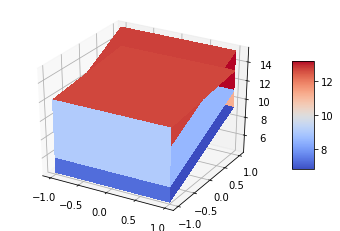

In [167]:
# C_plus
# 3 D plot of model factor a and d vs y
# Z axis is the predicted observation Yhat3

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['a']
x2=C_plus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

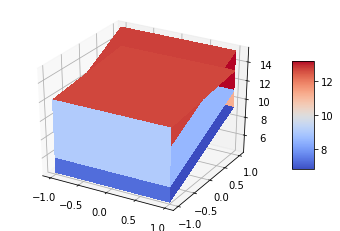

In [168]:
# C_plus
# 3 D plot of model factor b and d vs y
# Z axis is the predicted observation Yhat3

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_plus['b']
x2=C_plus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat3, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

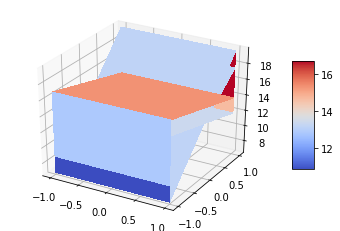

In [169]:
# C_minus
# 3 D plot of model factor a and b vs y
# Z axis is the predicted observation Yhat4

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['a']
x2=C_minus['b']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

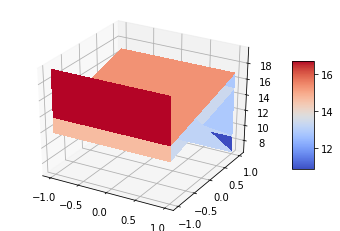

In [170]:
# C_minus
# 3 D plot of model factor a and d vs y
# Z axis is the predicted observation Yhat4

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['a']
x2=C_minus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

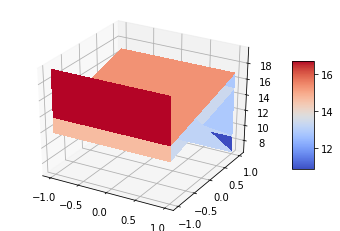

In [171]:
# C_minus
# 3 D plot of model factor b and d vs y
# Z axis is the predicted observation Yhat4

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=C_minus['b']
x2=C_minus['d']
x1, x2 = np.meshgrid(x1, x2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, Yhat4, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# 13.20 (c)

When using the heat treatment method categorized by C=+, I recommend using low levels for factors a (pouring temperature), b (titanium content), and d (amount of grain refiner used) to reduce variability and minimize average crack length. 

# 13.20 (d)

When using the heat treatment method categorized by C=-, I recommend using 
low levels of factors a (pouring temperature) and b (titanium content) as well as high levels of factor d (amount of grain refinder used) to reduce variability and minimize average crack length.